In [1]:
using DataFrames
using CSV
using XLSX
using Plots

In [2]:
pwd()

"/home/grace/Documents/python/tsca_categories/notebooks"

In [3]:
TOP = replace(pwd(), "/notebooks" => "/")
raw_dir = TOP*"data/raw/"
interim_dir= TOP*"data/interim/"
external_dir = TOP*"data/external/"

"/home/grace/Documents/python/tsca_categories/data/external/"

In [6]:
df = DataFrame(XLSX.readtable(interim_dir*"categorisatons_wscreening_constraints_221122.xlsx", "All data"))

Row,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,DATA_SOURCES,NUMBER_OF_PUBMED_ARTICLES,PUBCHEM_DATA_SOURCES,CPDAT_COUNT,MolWeight,nbAtoms,nbHeavyAtoms,nbC,nbO,nbN,nbAromAtom,nbRing,nbHeteroRing,Sp3Sp2HybRatio,nbRotBd,nbHBdAcc,ndHBdDon,nbLipinskiFailures,TopoPolSurfAir,MolarRefract,CombDipolPolariz,LogP_pred,LogP_predRange,AD_LogP,AD_index_LogP,Conf_index_LogP,MP_pred,MP_predRange,AD_MP,AD_index_MP,Conf_index_MP,BP_pred,BP_predRange,AD_BP,AD_index_BP,Conf_index_BP,LogVP_pred,VP_predRange,AD_VP,AD_index_VP,Conf_index_VP,LogWS_pred,WS_predRange,AD_WS,AD_index_WS,Conf_index_WS,LogHL_pred,HL_predRange,AD_HL,AD_index_HL,Conf_index_HL,RT_pred,AD_RT,AD_index_RT,Conf_index_RT,RT_predRange,LogKOA_pred,KOA_predRange,AD_KOA,AD_index_KOA,Conf_index_KOA,ionization,pKa_a_pred,pKa_a_predRange,pKa_b_pred,pKa_b_predRange,AD_pKa,AD_index_pKa,Conf_index_pKa,LogD55_pred,LogD55_predRange,LogD74_pred,LogD74_predRange,AD_LogD,AD_index_LogD,Conf_index_LogD,errors,qsar_ready_smiles,HLC,WS_pred_mol/L,WS_pred_mg/L,test_track,physical_form,NCC,VENDOR_COUNT,IN_SIGMA-ALDRICH,Kingdom,Superclass,Class,ClassyFire,⋯
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,⋯
1,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,124.125,61,-,75,-,124.125,25,9,9,0,0,0,0,0,1,5,0,0,0,0,33.0863,0.236,4.51,[4.48:4.51],1,0.998,0.884,-50,[-55:-45],1,0.998,0.97,151,[150:152],1,0.998,0.994,0.8,[1:0.86],1,0.998,0.827,-4.22,[-4.24:-4.22],1,0.998,0.981,-1.18,[-1.67:-0.69],1,0.592,0.694,12.34,1,0.476,0.469,[6.99:15.52],3.63,[3.31:3.98],1,0.99,0.88,0,missing,missing,missing,missing,0,0,0,4.51,[4.48:4.51],4.51,[4.48:4.51],0,0.499,0.442,missing,CCCCCCCC#C,0.0660693,6.0256e-5,7.47928,B,liquid,"('Neutral Organics',)",47,1,Organic compounds,Acetylides,N/a,Acetylides,⋯
2,DTXSID30870753,1-Hexyne,693-02-7,CGHIBGNXEGJPQZ-UHFFFAOYSA-N,Hex-1-yne,CCCCC#C,"InChI=1S/C6H10/c1-3-5-6-4-2/h1H,4-6H2,2H3",C6H10,82.146,82.0783,58,-,119,-,82.0783,16,6,6,0,0,0,0,0,1,2,0,0,0,0,24.3515,0.236,2.73,[2.69:2.77],1,0.998,0.894,-131,[-132:-124],1,0.998,0.839,71,[69:71],1,0.998,0.947,2.13,[2.06:2.2],1,0.998,0.826,-2.31,[-2.35:-2.27],1,0.998,0.927,-0.95,[-1.39:-0.51],1,0.745,0.757,3.74,0,0.325,0.461,[1.06:8.47],2.67,[2.24:3.1],1,0.99,0.827,0,missing,missing,missing,missing,0,0,0,2.73,[2.69:2.77],2.73,[2.69:2.77],0,0.499,0.447,missing,CCCCC#C,0.112202,0.00489779,402.002,C,liquid,"('Neutral Organics',)",63,1,Organic compounds,Acetylides,N/a,Acetylides,⋯
3,DTXSID7062374,"1,8-Nonadiyne",2396-65-8,DMOVPHYFYSASTC-UHFFFAOYSA-N,"Nona-1,8-diyne",C#CCCCCCC#C,"InChI=1S/C9H12/c1-3-5-7-9-8-6-4-2/h1-2H,5-9H2",C9H12,120.195,120.094,45,-,59,-,120.094,21,9,9,0,0,0,0,0,1,4,0,0,0,0,33.994,0.345,3.62,[3.4:3.84],1,0.59,0.736,-27,[-30:-24],1,0.998,0.895,162,[160:162],1,0.998,0.876,2.58,[1.07:4.09],0,0.407,0.46,-2.98,[-3.01:-2.95],1,0.998,0.926,-2.1,[-2.25:-1.95],1,0.637,0.804,9.37,1,0.531,0.507,[4.61:13.7],3.35,[3.02:3.67],1,0.986,0.841,0,missing,missing,missing,missing,0,0,0,3.62,[3.4:3.84],3.62,[3.4:3.84],0,0.295,0.368,missing,C#CCCCCCC#C,0.00794328,0.00104713,125.754,C,liquid,"('Neutral Organics',)",39,1,Organic compounds,Acetylides,N/a,Acetylides,⋯
4,DTXSID9061097,1-Pentadecyne,765-13-9,DONJGKADZJEXRJ-UHFFFAOYSA-N,Pentadec-1-yne,CCCCCCCCCCCCCC#C,"InChI=1S/C15H28/c1-3-5-7-9-11-13-15-14-12-10-8-6-4-2/h1H,4-15H2,2H3",C15H28,208.389,208.219,43,-,63,-,208.219,43,15,15,0,0,0,0,0,1,11,0,0,2,0,50.5559,0.236,6.61,[6.19:7.03],1,0.51,0.705,10,[6:14],1,0.998,0.959,268,[268:269],1,0.998,0.989,-1.76,[-3:-0.25],1,0.433,0.564,-8.12,[-8.8:-7.

In [7]:
first(df, 5)

Row,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,DATA_SOURCES,NUMBER_OF_PUBMED_ARTICLES,PUBCHEM_DATA_SOURCES,CPDAT_COUNT,MolWeight,nbAtoms,nbHeavyAtoms,nbC,nbO,nbN,nbAromAtom,nbRing,nbHeteroRing,Sp3Sp2HybRatio,nbRotBd,nbHBdAcc,ndHBdDon,nbLipinskiFailures,TopoPolSurfAir,MolarRefract,CombDipolPolariz,LogP_pred,LogP_predRange,AD_LogP,AD_index_LogP,Conf_index_LogP,MP_pred,MP_predRange,AD_MP,AD_index_MP,Conf_index_MP,BP_pred,BP_predRange,AD_BP,AD_index_BP,Conf_index_BP,LogVP_pred,VP_predRange,AD_VP,AD_index_VP,Conf_index_VP,LogWS_pred,WS_predRange,AD_WS,AD_index_WS,Conf_index_WS,LogHL_pred,HL_predRange,AD_HL,AD_index_HL,Conf_index_HL,RT_pred,AD_RT,AD_index_RT,Conf_index_RT,RT_predRange,LogKOA_pred,KOA_predRange,AD_KOA,AD_index_KOA,Conf_index_KOA,ionization,pKa_a_pred,pKa_a_predRange,pKa_b_pred,pKa_b_predRange,AD_pKa,AD_index_pKa,Conf_index_pKa,LogD55_pred,LogD55_predRange,LogD74_pred,LogD74_predRange,AD_LogD,AD_index_LogD,Conf_index_LogD,errors,qsar_ready_smiles,HLC,WS_pred_mol/L,WS_pred_mg/L,test_track,physical_form,NCC,VENDOR_COUNT,IN_SIGMA-ALDRICH,Kingdom,Superclass,Class,ClassyFire,⋯
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,⋯
1,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,124.125,61,-,75,-,124.125,25,9,9,0,0,0,0,0,1,5,0,0,0,0,33.0863,0.236,4.51,[4.48:4.51],1,0.998,0.884,-50,[-55:-45],1,0.998,0.97,151,[150:152],1,0.998,0.994,0.8,[1:0.86],1,0.998,0.827,-4.22,[-4.24:-4.22],1,0.998,0.981,-1.18,[-1.67:-0.69],1,0.592,0.694,12.34,1,0.476,0.469,[6.99:15.52],3.63,[3.31:3.98],1,0.99,0.88,0,missing,missing,missing,missing,0,0,0,4.51,[4.48:4.51],4.51,[4.48:4.51],0,0.499,0.442,missing,CCCCCCCC#C,0.0660693,6.0256e-5,7.47928,B,liquid,"('Neutral Organics',)",47,1,Organic compounds,Acetylides,N/a,Acetylides,⋯
2,DTXSID30870753,1-Hexyne,693-02-7,CGHIBGNXEGJPQZ-UHFFFAOYSA-N,Hex-1-yne,CCCCC#C,"InChI=1S/C6H10/c1-3-5-6-4-2/h1H,4-6H2,2H3",C6H10,82.146,82.0783,58,-,119,-,82.0783,16,6,6,0,0,0,0,0,1,2,0,0,0,0,24.3515,0.236,2.73,[2.69:2.77],1,0.998,0.894,-131,[-132:-124],1,0.998,0.839,71,[69:71],1,0.998,0.947,2.13,[2.06:2.2],1,0.998,0.826,-2.31,[-2.35:-2.27],1,0.998,0.927,-0.95,[-1.39:-0.51],1,0.745,0.757,3.74,0,0.325,0.461,[1.06:8.47],2.67,[2.24:3.1],1,0.99,0.827,0,missing,missing,missing,missing,0,0,0,2.73,[2.69:2.77],2.73,[2.69:2.77],0,0.499,0.447,missing,CCCCC#C,0.112202,0.00489779,402.002,C,liquid,"('Neutral Organics',)",63,1,Organic compounds,Acetylides,N/a,Acetylides,⋯
3,DTXSID7062374,"1,8-Nonadiyne",2396-65-8,DMOVPHYFYSASTC-UHFFFAOYSA-N,"Nona-1,8-diyne",C#CCCCCCC#C,"InChI=1S/C9H12/c1-3-5-7-9-8-6-4-2/h1-2H,5-9H2",C9H12,120.195,120.094,45,-,59,-,120.094,21,9,9,0,0,0,0,0,1,4,0,0,0,0,33.994,0.345,3.62,[3.4:3.84],1,0.59,0.736,-27,[-30:-24],1,0.998,0.895,162,[160:162],1,0.998,0.876,2.58,[1.07:4.09],0,0.407,0.46,-2.98,[-3.01:-2.95],1,0.998,0.926,-2.1,[-2.25:-1.95],1,0.637,0.804,9.37,1,0.531,0.507,[4.61:13.7],3.35,[3.02:3.67],1,0.986,0.841,0,missing,missing,missing,missing,0,0,0,3.62,[3.4:3.84],3.62,[3.4:3.84],0,0.295,0.368,missing,C#CCCCCCC#C,0.00794328,0.00104713,125.754,C,liquid,"('Neutral Organics',)",39,1,Organic compounds,Acetylides,N/a,Acetylides,⋯
4,DTXSID9061097,1-Pentadecyne,765-13-9,DONJGKADZJEXRJ-UHFFFAOYSA-N,Pentadec-1-yne,CCCCCCCCCCCCCC#C,"InChI=1S/C15H28/c1-3-5-7-9-11-13-15-14-12-10-8-6-4-2/h1H,4-15H2,2H3",C15H28,208.389,208.219,43,-,63,-,208.219,43,15,15,0,0,0,0,0,1,11,0,0,2,0,50.5559,0.236,6.61,[6.19:7.03],1,0.51,0.705,10,[6:14],1,0.998,0.959,268,[268:269],1,0.998,0.989,-1.76,[-3:-0.25],1,0.433,0.564,-8.12,[-8.8:-7.

In [8]:
names(df)[end-15:end]

16-element Vector{String}:
 "lvl2_centroid2"
 "lvl2_analogues"
 "lvl2_Dist"
 "final_centroid"
 "final_dist"
 "gt65_picks"
 "diverse_picks"
 "screenable"
 "group"
 "group_str"
 "screenable_centroid"
 "screenable_centroid_id"
 "screenable_centroid_id2"
 "screening_analogues"
 "screening_dist"
 "MaxMin_selection_picks"

In [15]:
using Pipe,  StatsPlots

In [16]:
df2 = @pipe df |> groupby(_, :group_str) |> sort!(combine(_,nrow), :nrow, rev = true)

Row,group_str,nrow
,Any,Int64
1,"('Benzene and substituted derivatives', 2.0)",562
2,"('Benzene and substituted derivatives', 8.0)",553
3,"('Prenol lipids', 2.0)",509
4,"('Fatty Acyls', 1.0)",469
5,"('Carboxylic acids and derivatives', 1.0)",362
6,"('Benzene and substituted derivatives', 10.0)",352
7,"('Carboxylic acids and derivatives', 5.0)",349
8,"('Organooxygen compounds', 3.0)",324
9,"('Organooxygen compounds', 5.0)",280


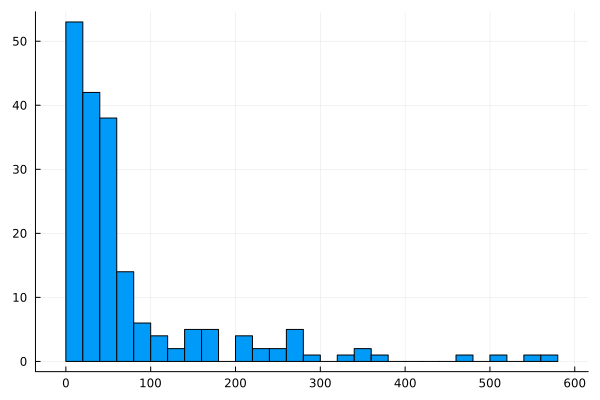

In [17]:
@df df2 histogram(:nrow, leg = false)

In [18]:
describe(df2)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,group_str,,"('Acetylides', nan)",,"('Triphenyl compounds', nan)",0,Any
2,nrow,74.5916,1,40.0,562,0,Int64


In [19]:
mydict = Dict("lessthan20" => df2[(df2.nrow .<= 20), :][!, "group_str"])

Dict{String, Vector{Any}} with 1 entry:
  "lessthan20" => ["('Diazines', 2.0)", "('Homogeneous non-metal compounds', 3.…

In [20]:
mydict["between20-70"] = df2[(df2.nrow .> 20) .&& (df2.nrow .<= 70) , :][!, "group_str"]
mydict["between70-150"] = df2[(df2.nrow .> 70) .&& (df2.nrow .<= 150) , :][!, "group_str"]
mydict["between150-300"]  = df2[(df2.nrow .> 150) .&& (df2.nrow .<= 300) , :][!, "group_str"]
mydict["between300-600"] = df2[(df2.nrow .> 300) .&& (df2.nrow .<= 600) , :][!, "group_str"]

8-element Vector{Any}:
 "('Benzene and substituted derivatives', 2.0)"
 "('Benzene and substituted derivatives', 8.0)"
 "('Prenol lipids', 2.0)"
 "('Fatty Acyls', 1.0)"
 "('Carboxylic acids and derivatives', 1.0)"
 "('Benzene and substituted derivatives', 10.0)"
 "('Carboxylic acids and derivatives', 5.0)"
 "('Organooxygen compounds', 3.0)"

In [21]:
mydict

Dict{String, Vector{Any}} with 5 entries:
  "lessthan20"     => ["('Diazines', 2.0)", "('Homogeneous non-metal compounds'…
  "between300-600" => ["('Benzene and substituted derivatives', 2.0)", "('Benze…
  "between150-300" => ["('Organooxygen compounds', 5.0)", "('Organoheterocyclic…
  "between20-70"   => ["('Other', 4.0)", "('Naphthalenes', 2.0)", "('Organic ph…
  "between70-150"  => ["('Benzene and substituted derivatives', 4.0)", "('Benze…

In [22]:
keys(mydict)
values(mydict)

ValueIterator for a Dict{String, Vector{Any}} with 5 entries. Values:
  Any["('Diazines', 2.0)", "('Homogeneous non-metal compounds', 3.0)", "('Nucle…
  Any["('Benzene and substituted derivatives', 2.0)", "('Benzene and substitute…
  Any["('Organooxygen compounds', 5.0)", "('Organoheterocyclic compounds', 3.0)…
  Any["('Other', 4.0)", "('Naphthalenes', 2.0)", "('Organic phosphonic acids an…
  Any["('Benzene and substituted derivatives', 4.0)", "('Benzene and substitute…

In [23]:
[length(e) for e in values(mydict)]

5-element Vector{Int64}:
 59
  8
 20
 83
 21

In [24]:
[(k,length(v)) for (k,v) in zip(keys(mydict), values(mydict))]

5-element Vector{Tuple{String, Int64}}:
 ("lessthan20", 59)
 ("between300-600", 8)
 ("between150-300", 20)
 ("between20-70", 83)
 ("between70-150", 21)

In [25]:
names(df)[end-15:end]

16-element Vector{String}:
 "lvl2_centroid2"
 "lvl2_analogues"
 "lvl2_Dist"
 "final_centroid"
 "final_dist"
 "gt65_picks"
 "diverse_picks"
 "screenable"
 "group"
 "group_str"
 "screenable_centroid"
 "screenable_centroid_id"
 "screenable_centroid_id2"
 "screening_analogues"
 "screening_dist"
 "MaxMin_selection_picks"

In [26]:
mydict

Dict{String, Vector{Any}} with 5 entries:
  "lessthan20"     => ["('Diazines', 2.0)", "('Homogeneous non-metal compounds'…
  "between300-600" => ["('Benzene and substituted derivatives', 2.0)", "('Benze…
  "between150-300" => ["('Organooxygen compounds', 5.0)", "('Organoheterocyclic…
  "between20-70"   => ["('Other', 4.0)", "('Naphthalenes', 2.0)", "('Organic ph…
  "between70-150"  => ["('Benzene and substituted derivatives', 4.0)", "('Benze…

In [27]:
mydict2 = Dict(e => key for (key, value) in mydict for e in value)

Dict{String, String} with 191 entries:
  "('Pyridines and derivatives', 1.0)"                => "between20-70"
  "('Anthracenes', 8.0)"                              => "between20-70"
  "('Fatty Acyls', 4.0)"                              => "between70-150"
  "('Organic phosphoric acids and derivatives', 2.0)" => "lessthan20"
  "('Azobenzenes', 7.0)"                              => "lessthan20"
  "('Organic carbonic acids and derivatives', 1.0)"   => "lessthan20"
  "('Fatty Acyls', nan)"                              => "lessthan20"
  "('Homogeneous non-metal compounds', 1.0)"          => "lessthan20"
  "('Triphenyl compounds', nan)"                      => "between20-70"
  "('Organic oxygen compounds', nan)"                 => "lessthan20"
  "('Fatty Acyls', 2.0)"                              => "between150-300"
  "('Azoles', 2.0)"                                   => "between20-70"
  "('Azobenzenes', 4.0)"                              => "between20-70"
  "('Benzene and substituted deriv

In [28]:
transform!(df, :group_str => ByRow(x -> mydict2[x]) => :category_size)

Row,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,DATA_SOURCES,NUMBER_OF_PUBMED_ARTICLES,PUBCHEM_DATA_SOURCES,CPDAT_COUNT,MolWeight,nbAtoms,nbHeavyAtoms,nbC,nbO,nbN,nbAromAtom,nbRing,nbHeteroRing,Sp3Sp2HybRatio,nbRotBd,nbHBdAcc,ndHBdDon,nbLipinskiFailures,TopoPolSurfAir,MolarRefract,CombDipolPolariz,LogP_pred,LogP_predRange,AD_LogP,AD_index_LogP,Conf_index_LogP,MP_pred,MP_predRange,AD_MP,AD_index_MP,Conf_index_MP,BP_pred,BP_predRange,AD_BP,AD_index_BP,Conf_index_BP,LogVP_pred,VP_predRange,AD_VP,AD_index_VP,Conf_index_VP,LogWS_pred,WS_predRange,AD_WS,AD_index_WS,Conf_index_WS,LogHL_pred,HL_predRange,AD_HL,AD_index_HL,Conf_index_HL,RT_pred,AD_RT,AD_index_RT,Conf_index_RT,RT_predRange,LogKOA_pred,KOA_predRange,AD_KOA,AD_index_KOA,Conf_index_KOA,ionization,pKa_a_pred,pKa_a_predRange,pKa_b_pred,pKa_b_predRange,AD_pKa,AD_index_pKa,Conf_index_pKa,LogD55_pred,LogD55_predRange,LogD74_pred,LogD74_predRange,AD_LogD,AD_index_LogD,Conf_index_LogD,errors,qsar_ready_smiles,HLC,WS_pred_mol/L,WS_pred_mg/L,test_track,physical_form,NCC,VENDOR_COUNT,IN_SIGMA-ALDRICH,Kingdom,Superclass,Class,ClassyFire,⋯
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,⋯
1,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,124.125,61,-,75,-,124.125,25,9,9,0,0,0,0,0,1,5,0,0,0,0,33.0863,0.236,4.51,[4.48:4.51],1,0.998,0.884,-50,[-55:-45],1,0.998,0.97,151,[150:152],1,0.998,0.994,0.8,[1:0.86],1,0.998,0.827,-4.22,[-4.24:-4.22],1,0.998,0.981,-1.18,[-1.67:-0.69],1,0.592,0.694,12.34,1,0.476,0.469,[6.99:15.52],3.63,[3.31:3.98],1,0.99,0.88,0,missing,missing,missing,missing,0,0,0,4.51,[4.48:4.51],4.51,[4.48:4.51],0,0.499,0.442,missing,CCCCCCCC#C,0.0660693,6.0256e-5,7.47928,B,liquid,"('Neutral Organics',)",47,1,Organic compounds,Acetylides,N/a,Acetylides,⋯
2,DTXSID30870753,1-Hexyne,693-02-7,CGHIBGNXEGJPQZ-UHFFFAOYSA-N,Hex-1-yne,CCCCC#C,"InChI=1S/C6H10/c1-3-5-6-4-2/h1H,4-6H2,2H3",C6H10,82.146,82.0783,58,-,119,-,82.0783,16,6,6,0,0,0,0,0,1,2,0,0,0,0,24.3515,0.236,2.73,[2.69:2.77],1,0.998,0.894,-131,[-132:-124],1,0.998,0.839,71,[69:71],1,0.998,0.947,2.13,[2.06:2.2],1,0.998,0.826,-2.31,[-2.35:-2.27],1,0.998,0.927,-0.95,[-1.39:-0.51],1,0.745,0.757,3.74,0,0.325,0.461,[1.06:8.47],2.67,[2.24:3.1],1,0.99,0.827,0,missing,missing,missing,missing,0,0,0,2.73,[2.69:2.77],2.73,[2.69:2.77],0,0.499,0.447,missing,CCCCC#C,0.112202,0.00489779,402.002,C,liquid,"('Neutral Organics',)",63,1,Organic compounds,Acetylides,N/a,Acetylides,⋯
3,DTXSID7062374,"1,8-Nonadiyne",2396-65-8,DMOVPHYFYSASTC-UHFFFAOYSA-N,"Nona-1,8-diyne",C#CCCCCCC#C,"InChI=1S/C9H12/c1-3-5-7-9-8-6-4-2/h1-2H,5-9H2",C9H12,120.195,120.094,45,-,59,-,120.094,21,9,9,0,0,0,0,0,1,4,0,0,0,0,33.994,0.345,3.62,[3.4:3.84],1,0.59,0.736,-27,[-30:-24],1,0.998,0.895,162,[160:162],1,0.998,0.876,2.58,[1.07:4.09],0,0.407,0.46,-2.98,[-3.01:-2.95],1,0.998,0.926,-2.1,[-2.25:-1.95],1,0.637,0.804,9.37,1,0.531,0.507,[4.61:13.7],3.35,[3.02:3.67],1,0.986,0.841,0,missing,missing,missing,missing,0,0,0,3.62,[3.4:3.84],3.62,[3.4:3.84],0,0.295,0.368,missing,C#CCCCCCC#C,0.00794328,0.00104713,125.754,C,liquid,"('Neutral Organics',)",39,1,Organic compounds,Acetylides,N/a,Acetylides,⋯
4,DTXSID9061097,1-Pentadecyne,765-13-9,DONJGKADZJEXRJ-UHFFFAOYSA-N,Pentadec-1-yne,CCCCCCCCCCCCCC#C,"InChI=1S/C15H28/c1-3-5-7-9-11-13-15-14-12-10-8-6-4-2/h1H,4-15H2,2H3",C15H28,208.389,208.219,43,-,63,-,208.219,43,15,15,0,0,0,0,0,1,11,0,0,2,0,50.5559,0.236,6.61,[6.19:7.03],1,0.51,0.705,10,[6:14],1,0.998,0.959,268,[268:269],1,0.998,0.989,-1.76,[-3:-0.25],1,0.433,0.564,-8.12,[-8.8:-7.

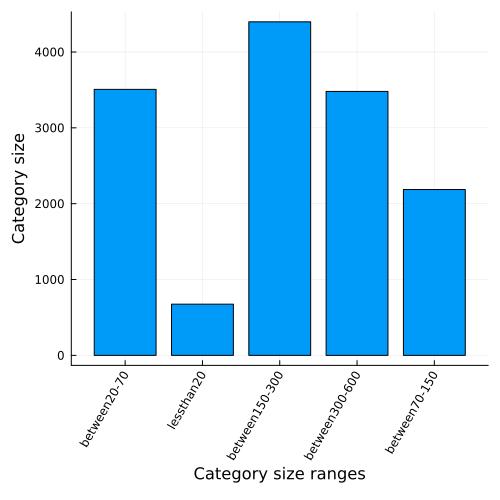

In [29]:
value_counts = combine((groupby(df, :category_size)), nrow)

Plots.bar(value_counts[!, "category_size"], value_counts[!, "nrow"], leg = false, xrotation=60)
xlabel!("Category size ranges")
ylabel!("Category size")
plot!(size=(500,500))

In [ ]:
df["final_picks"] = 

In [50]:
mylst = []
for row in eachrow( df)
     if (row["screenable"] .==1) & (row["MaxMin_selection_picks"] .==1) & (row["category_size"] in ["between20-70", "between70-150", "between150-300"])
        push!(mylst, row["dtxsid"])
    end
end


In [51]:
mylst

336-element Vector{Any}:
 "DTXSID4063036"
 "DTXSID70871320"
 "DTXSID9062647"
 "DTXSID1066578"
 "DTXSID9044376"
 "DTXSID8025208"
 "DTXSID9045055"
 "DTXSID5044730"
 "DTXSID0072198"
 "DTXSID1059440"
 "DTXSID5058850"
 "DTXSID0059584"
 "DTXSID4058865"
 ⋮
 "DTXSID8059766"
 "DTXSID6065135"
 "DTXSID90866970"
 "DTXSID701014663"
 "DTXSID30274393"
 "DTXSID7022419"
 "DTXSID70867369"
 "DTXSID8061428"
 "DTXSID3045067"
 "DTXSID0060149"
 "DTXSID6064456"
 "DTXSID70889405"

In [ ]:
df4['dtxsid'].apply(lambda x: 1 if x in mylst else np.nan)   

In [78]:
mylst2 = []
for e in df[!, :dtxsid]
    if e in mylst
        push!(mylst2,1)
    else push!(mylst2,0)
    end
end

In [80]:
df.final_picks = mylst2

14247-element Vector{Any}:
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 1
 0
 0
 0
 0
 0
 0
 1
 0
 0
 0

In [94]:
first(df[!, [:dtxsid, :final_picks, :group_str]],5)

Row,dtxsid,final_picks,group_str
,Any,Any,Any
1,DTXSID4063036,1,"('Acetylides', nan)"
2,DTXSID30870753,0,"('Acetylides', nan)"
3,DTXSID7062374,0,"('Acetylides', nan)"
4,DTXSID9061097,0,"('Acetylides', nan)"
5,DTXSID1061233,0,"('Acetylides', nan)"


In [96]:
combine(groupby(df, :final_picks), nrow) 

Row,final_picks,nrow
,Any,Int64
1,1,336
2,0,13911
